In [1]:
# installs
!pip install -q scikit-learn


In [38]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load dataset
# X = input data
# y = target
X, y = load_wine(return_X_y=True, as_frame=True)


In [40]:
# Data exploration
print(f"shape: {X.shape}") # 178 data points, 13 variables
print(f"{X.head}")
print(f"{X.describe()}")

print(X.isna().sum()) # No NAs in data

shape: (178, 13)
<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

    

In [41]:
# Data exploration
print(f"shape: {y.shape}") # 178 data points
print(f"{y.head}")
print(f"{y.describe()}")

print(y.isna().sum()) # No NAs in data
y.value_counts("target")

shape: (178,)
<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64>
count    178.000000
mean       0.938202
std        0.775035
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64
0


,proportion
target,
1,0.398876
0,0.331461
2,0.269663


In [42]:
# Prep data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(f'train set: {X_train} \n\ntest set: {X_test}\n\ny train: {y_train}\n\ny test: {y_test}')

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train accuracy: 100.00%
Test accuracy: 97.22222222222221%


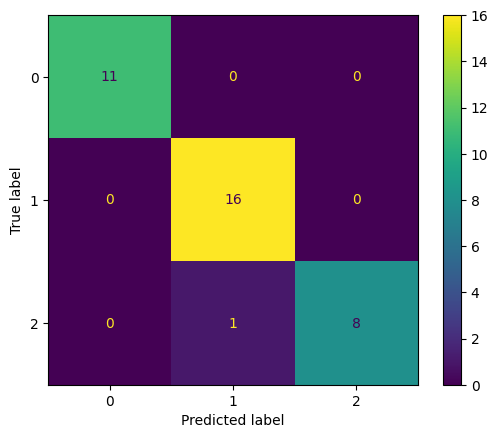

In [43]:
# Train model
model = LogisticRegression()

model.fit(X_train, y_train)

# Model accuracy
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train accuracy: {train_accuracy * 100:.2f}%")

test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy: {test_accuracy * 100}%")

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

